### Import Libraries

In [ ]:
import numpy as np 
import pandas as pd 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas
import seaborn as sns 
from sklearn import preprocessing
import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from collections import Counter 
import re
import string
import unicodedata
import matplotlib.cm as cm
from matplotlib import rcParams
from prettytable import PrettyTable
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

### reding csv file

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data_for_colab/all_data.csv', lineterminator='\n')
df.head()

,id,dialect,text
0,1175358310087892992,IQ,@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .
1,1175416117793349632,IQ,@7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. ح...
2,1175450108898565888,IQ,@KanaanRema مبين من كلامه خليجي
3,1175471073770573824,IQ,@HAIDER76128900 يسلملي مرورك وروحك الحلوه💐
4,1175496913145217024,IQ,@hmo2406 وين هل الغيبه اخ محمد 🌸🌺


### Checking null values

In [ ]:
df[df.isnull().any(axis=1)].head()

,id,dialect,text


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458197 entries, 0 to 458196
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   id       458197 non-null  int64 
 1   dialect  458197 non-null  object
 2   text     458197 non-null  object
dtypes: int64(1), object(2)
memory usage: 10.5+ MB


In [ ]:
np.sum(df.isnull().any(axis=1))

0

In [ ]:
df.isnull().any(axis=0)

id         False
dialect    False
text       False
dtype: bool

In [ ]:
df.nunique()

id         458197
dialect        18
text       458197
dtype: int64

### cleaning tweet text

In [ ]:
def text_preprocessing(text):
    """
    - Remove entity mentions (eg. '@united')
    - Correct errors (eg. '&amp;' to '&')
    @param    text (str): a string to be processed.
    @return   text (Str): the processed string.
    """
  

    # Normalize unicode encoding
    text = unicodedata.normalize('NFC', text)
    # Remove '@name'
    text = re.sub(r'(@.*?)[\s]', ' ', text)

    # Replace '&amp;' with '&'
    text = re.sub(r'&amp;', '&', text)

    # Remove trailing whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    #Remove URLs
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '<URL>', text)


    return text

In [ ]:
df["text"] = df['text'].apply(lambda x: text_preprocessing(x)) # apply used to call the method processpost

In [ ]:
df.head()

,id,dialect,text
0,1175358310087892992,IQ,لكن بالنهاية .. ينتفض .. يغير .
1,1175416117793349632,IQ,يعني هذا محسوب على البشر .. حيونه ووحشيه .. وت...
2,1175450108898565888,IQ,مبين من كلامه خليجي
3,1175471073770573824,IQ,يسلملي مرورك وروحك الحلوه💐
4,1175496913145217024,IQ,وين هل الغيبه اخ محمد 🌸🌺


In [ ]:
for letter in '@#.][!XR':
    df['text'] = df['text'].astype(str).str.replace(letter,'')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


### Preprocess data

In [ ]:
arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations

def remove_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

### normalize_arabic¶

In [ ]:
def normalize_arabic(text):
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)
    return text

### remove_repeating_char

In [ ]:
def remove_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

### processPost for applying all functions

In [ ]:
def processPost(tweet): 

    #Replace @username with empty string
    tweet = re.sub('@[^\s]+', ' ', tweet)
    
    #Convert www.* or https?://* to " "
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',tweet)
    
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)

    # remove punctuations
    tweet= remove_punctuations(tweet)
    
    # normalize the tweet
     #tweet= normalize_arabic(tweet)
    
    # remove repeated letters
    tweet=remove_repeating_char(tweet)
    
    return tweet

### applying processPost function for preprocessing

In [ ]:
df["text"] = df['text'].apply(lambda x: processPost(x)) # apply used to call the method processpost

In [ ]:
df.head()

,id,dialect,text
0,1175358310087892992,IQ,لكن بالنهاية ينتفض يغير
1,1175416117793349632,IQ,يعني هذا محسوب على البشر حيونه وحشيه وتطلبون م...
2,1175450108898565888,IQ,مبين من كلامه خليجي
3,1175471073770573824,IQ,يسلملي مرورك وروحك الحلوه💐
4,1175496913145217024,IQ,وين هل الغيبه اخ محمد 🌸🌺


### Getting Tokenize the tweet text

In [ ]:
tokenizer = RegexpTokenizer(r'\w+')
df["text"] = df["text"].apply(tokenizer.tokenize)

In [ ]:
df.head()

,id,dialect,text
0,1175358310087892992,IQ,"[لكن, بالنهاية, ينتفض, يغير]"
1,1175416117793349632,IQ,"[يعني, هذا, محسوب, على, البشر, حيونه, وحشيه, و..."
2,1175450108898565888,IQ,"[مبين, من, كلامه, خليجي]"
3,1175471073770573824,IQ,"[يسلملي, مرورك, وروحك, الحلوه]"
4,1175496913145217024,IQ,"[وين, هل, الغيبه, اخ, محمد]"


### Stop words

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopwords_list = stopwords.words('arabic')

In [ ]:
listToStr = ' '.join([str(elem) for elem in stopwords_list])

### Removing stop words

In [ ]:
df["text"]=df["text"].apply(lambda x: [item for item in x if item not in stopwords_list])

In [ ]:
df.head()

,id,dialect,text
0,1175358310087892992,IQ,"[بالنهاية, ينتفض, يغير]"
1,1175416117793349632,IQ,"[يعني, محسوب, البشر, حيونه, وحشيه, وتطلبون, ال..."
2,1175450108898565888,IQ,"[مبين, كلامه, خليجي]"
3,1175471073770573824,IQ,"[يسلملي, مرورك, وروحك, الحلوه]"
4,1175496913145217024,IQ,"[وين, الغيبه, اخ, محمد]"


### text information

In [ ]:
all_words = [word for tokens in df["text"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in df["text"]]

VOCAB = sorted(list(set(all_words)))

print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

5032139 words total, with a vocabulary size of 486147
Max sentence length is 86


## top 25 words in curpos

In [ ]:
counter = Counter(all_words)

In [ ]:
counter.most_common(25)

[('الي', 71366),
 ('اله', 49647),
 ('انا', 30791),
 ('مش', 30787),
 ('واله', 24687),
 ('شي', 19499),
 ('انت', 16625),
 ('ان', 16252),
 ('عشان', 13319),
 ('الناس', 13261),
 ('يعني', 13185),
 ('مو', 11944),
 ('علي', 11855),
 ('او', 11316),
 ('اذا', 11270),
 ('ده', 10560),
 ('اي', 10418),
 ('يوم', 9847),
 ('شو', 9664),
 ('انه', 9536),
 ('وين', 8615),
 ('ليش', 8527),
 ('الا', 8163),
 ('لازم', 7973),
 ('حد', 7927)]

In [ ]:
counted_words = Counter(all_words)

words = []
counts = []
for letter, count in counted_words.most_common(25):
    words.append(letter)
    counts.append(count)

<BarContainer object of 25 artists>

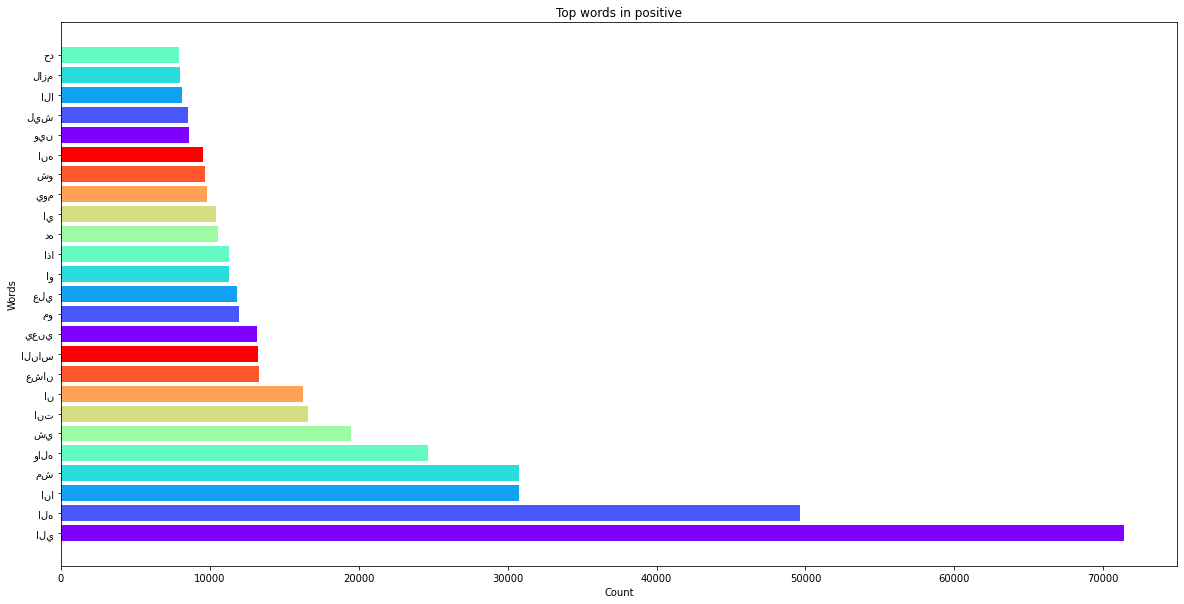

In [ ]:
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in positive')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)

### Features Extraction from tweets text with TFIDF unigram

In [ ]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    ngram_range=(1, 1), max_feture = 100)

unigramdataGet= word_vectorizer.fit_transform(df['text'].astype('str'))
unigramdataGet = unigramdataGet.toarray()

vocab = word_vectorizer.get_feature_names()
unigramdata_features=pd.DataFrame(np.round(unigramdataGet, 1), columns=vocab)
unigramdata_features[unigramdata_features>0] = 1

unigramdata_features.head()

In [ ]:
pro= preprocessing.LabelEncoder()
encpro=pro.fit_transform(df['dialect'])
df['dialect'] = encpro

In [ ]:
y=df['dialect']
X=unigramdata_features

In [ ]:
df.sample()

,id,dialect,text
285202,616221924373471232,3,"[يارب, سلم, أحبابنا, وقرايبنا, وزمايلنا, الى, ..."


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.15, random_state = 41)

In [ ]:
nb=GaussianNB()
nb= nb.fit(X_train , y_train)
nb

GaussianNB()

In [ ]:
y_pred = nb.predict(X_test)
nb_1=nb.score(X_test, y_test)
print('Accuracy= {:.3f}'.format(nb.score(X_test, y_test)))

Accuracy= 0.163


In [ ]:
nb_1=nb.score(X_train, y_train)
print('Accuracy= {:.3f}'.format(nb.score(X_train, y_train)))

Accuracy= 0.164


In [ ]:
df["text"]

0                                   [بالنهاية, ينتفض, يغير]
1         [يعني, محسوب, البشر, حيونه, وحشيه, وتطلبون, ال...
2                                      [مبين, كلامه, خليجي]
3                            [يسلملي, مرورك, وروحك, الحلوه]
4                                   [وين, الغيبه, اخ, محمد]
                                ...                        
458192                         [مبسوطين, منك, الي, باسطانا]
458193                            [واله, ماينده, ابش, يختي]
458194    [شو, عملنا, حنا, تهربي, منا, احنا, مساكين, ليش...
458195                              [اله, يبارك, وبالعافيه]
458196                         [السحله, ضيفي, بتطلع, سحليه]
Name: text, Length: 458197, dtype: object

In [ ]:
df["dialect"]

0         4
1         4
2         4
3         4
4         4
         ..
458192    1
458193    1
458194    1
458195    1
458196    1
Name: dialect, Length: 458197, dtype: int64

In [ ]:
unigramdata_features

,احسن,احنا,اذا,اصلا,اكتر,اكثر,اكيد,ال,الا,الحين,...,وانت,وش,وقت,وين,يارب,يعني,يقول,يكون,يمكن,يوم
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
458193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
458194,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
458195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
RC= RidgeClassifier()
RC= RC.fit(X_train , y_train)
RC

RidgeClassifier()

In [ ]:
y_pred = RC.predict(X_test)
rc_1=RC.score(X_test, y_test)
print('Accuracy= {:.3f}'.format(RC.score(X_test, y_test)))

Accuracy= 0.210


In [ ]:
PC= PassiveAggressiveClassifier()
PC= PC.fit(X_train , y_train)
PC

PassiveAggressiveClassifier()

In [ ]:
y_pred = PC.predict(X_test)
pc_1=PC.score(X_test, y_test)
print('Accuracy= {:.3f}'.format(PC.score(X_test, y_test)))

Accuracy= 0.158


In [ ]:
LR= LogisticRegression(penalty = 'l2', C = 1)
LR= LR.fit(X_train , y_train)
LR

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(C=1)

In [ ]:
y_pred = LR.predict(X_test)
lr_1=LR.score(X_test, y_test)
print('Accuracy= {:.3f}'.format(LR.score(X_test, y_test)))

Accuracy= 0.221


In [ ]:
tv=['هلأ ما قصؤت']

In [ ]:
x = word_vectorizer.transform(tv)

In [ ]:
pred=RC.predict(x)
pred=pro.inverse_transform(pred)
prediction=pd.DataFrame(pred, columns=['Prediction']) 
print (prediction)

  Prediction
0         PL


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RidgeClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
result=pd.DataFrame()
result['Text']=tv
result['Prediction']=prediction
result

,Text,Prediction
0,هلأ ما قصؤت,PL
